In [3]:
import os
import requests as req
import pandas as pd

In [33]:
IRIS_FILE = req.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [36]:
with open(os.getcwd() + '/iris.data', 'w') as fw_iris:
    fw_iris.write(IRIS_FILE.text)

In [4]:
IRIS_DF = pd.read_csv(os.getcwd() + '/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [5]:
virginica = IRIS_DF[(IRIS_DF['class'] == 'Iris-virginica') & (IRIS_DF['petal width'] > 2.2)].reset_index()

In [7]:
virginica

,index,sepal length,sepal width,petal length,petal width,class
0,100,6.3,3.3,6.0,2.5,Iris-virginica
1,109,7.2,3.6,6.1,2.5,Iris-virginica
2,114,5.8,2.8,5.1,2.4,Iris-virginica
3,115,6.4,3.2,5.3,2.3,Iris-virginica
4,118,7.7,2.6,6.9,2.3,Iris-virginica
5,120,6.9,3.2,5.7,2.3,Iris-virginica
6,135,7.7,3.0,6.1,2.3,Iris-virginica
7,136,6.3,3.4,5.6,2.4,Iris-virginica
8,140,6.7,3.1,5.6,2.4,Iris-virginica
9,141,6.9,3.1,5.1,2.3,Iris-virginica


In [8]:
virginica.describe()

,index,sepal length,sepal width,petal length,petal width
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,129.142857,6.735714,3.157143,5.692857,2.364286
std,15.815558,0.540096,0.256348,0.490626,0.084190
min,100.000000,5.800000,2.600000,5.100000,2.300000
25%,115.750000,6.325000,3.025000,5.325000,2.300000
50%,135.500000,6.700000,3.200000,5.650000,2.300000
75%,142.500000,6.900000,3.300000,5.975000,2.400000
max,148.000000,7.700000,3.600000,6.900000,2.500000


In [9]:
virginica.corr()

,index,sepal length,sepal width,petal length,petal width
index,1.000000,0.035378,0.033881,-0.325017,-0.382942
sepal length,0.035378,1.000000,-0.254779,0.706446,-0.240465
sepal width,0.033881,-0.254779,1.000000,-0.173872,0.458260
petal length,-0.325017,0.706446,-0.173872,1.000000,0.123709
petal width,-0.382942,-0.240465,0.458260,0.123709,1.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.style.use('ggplot')

In [12]:
%matplotlib inline

In [13]:
import numpy as np

Text(0.5,1.01,'Iris Petal Width')

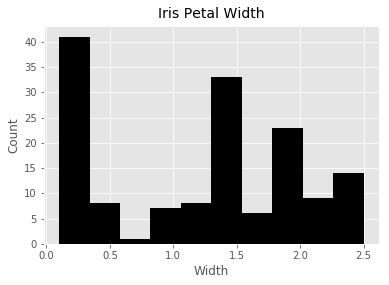

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(IRIS_DF['petal width'], color='black')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)